# Languages

In [9]:
# === Imports === 

import re 
import seaborn as sns
from matplotlib import pyplot as plt
from os.path import join
from os.path import realpath, dirname
import os
from lxml import etree
from io import StringIO, BytesIO
from collections import Counter
import pandas as pd
import numpy as np


# === Files and parameters === 

wdir = join("/", "media", "christof", "Data", "Github", "christofs", "BIB18")
bibdatafile = join(wdir, "data", "BIB18_Zotero-RDF.rdf") 
#bibdatafile = join(wdir, "data", "BIB18_Zotero-RDF_TEST.rdf") 

namespaces = {
    "foaf" : "http://xmlns.com/foaf/0.1/",
    "bib" : "http://purl.org/net/biblio#",
    "dc" : "http://purl.org/dc/elements/1.1/",
    "z" : "http://www.zotero.org/namespaces/export#",
    "rdf" : "http://www.w3.org/1999/02/22-rdf-syntax-ns#"
    }

# === Load the dataset === 

def read_xml(bibdatafile): 
    bibdata = etree.parse(bibdatafile)
    return bibdata
bibdata = read_xml(bibdatafile)


Languages


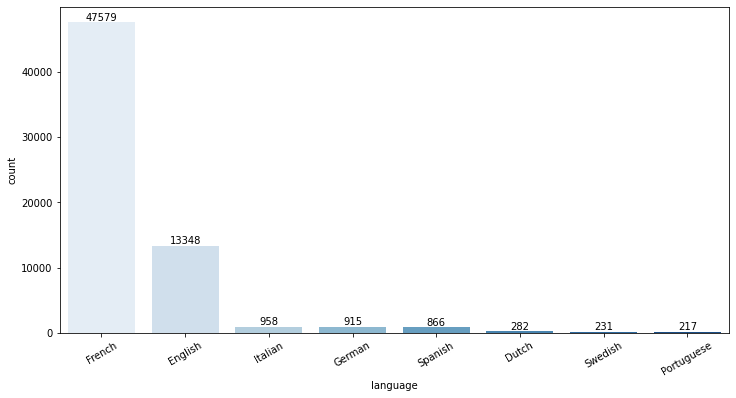

In [35]:
def get_languages(bibdata): 
    print("\nLanguages")

    # Find all the instances of "language" Element and its content
    xpath = "//z:language/text()"
    languages = bibdata.xpath(xpath, namespaces=namespaces)
    # Identify frequency of languages
    languages_counts = Counter(languages)
    languages_counts = dict(sorted(languages_counts.items(), key = lambda item: item[1], reverse=True)[:10])
    
 
    # Visualize using a simple bar chart 
    lc = pd.DataFrame.from_dict(languages_counts, orient="index", columns=["count"]).reset_index().rename({"index" : "language"}, axis=1)
    plt.figure(figsize=(12,6))
    pal = sns.color_palette("Blues", len(lc))
    fig = sns.barplot(data=lc, x="language", y="count", palette=pal)
    fig.set_xticklabels(fig.get_xticklabels(), rotation=30)
    for i in fig.containers:
        fig.bar_label(i,)
    plt.savefig(join(wdir, "figures", "languages_counts.png"))
    return languages, languages_counts
  
languages, languages_counts = get_languages(bibdata)



In [36]:
    
# Provide some results as a text. 
print("There are " + str(len(languages))  + " instances of language in the dataset.")
print("At the moment, only " + str(len(languages_counts)) + " different languages are considered for analysis.")
languages_perc = {k: v / len(languages) for k, v in languages_counts.items()}
print("The most prevalent language is " + str(list(languages_perc.keys())[0]) + ", with " + "{:2.2%}".format(list(languages_perc.values())[0]) + " of all entries.")




There are 64396 instances of language in the dataset.
At the moment, only 8 different languages are considered for analysis.
The most prevalent language is French, with 73.89% of all entries.
